In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# np.nonzero?
# np.argmax?

In [3]:
# 创建二值化图像0-1
img = np.zeros((50,50))
img[10:40, 10:40] = np.eye(30)

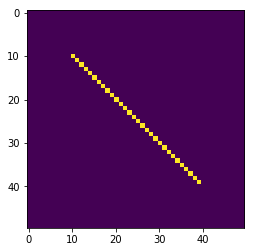

In [4]:
plt.imshow(img)

# 霍夫变换原理
霍夫变换原理，计算过一个点的霍夫空间$\rho$和$\theta$的交集，最大的那些便是直线，其中$\rho$和$\theta$计算如下：
$$\rho=x \cos{\theta}+y \sin{\theta}$$

---
## 参考资料

[Understanding Hough Transform With Python](https://alyssaq.github.io/2014/understanding-hough-transform/) 代码主要参考这篇博客。

[Hough Line Transform](https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html) opencv中使用hough变换的例子。

In [5]:
def hough_line(img):
    height, width = img.shape
    thetas = np.deg2rad(np.arange(-90, 90))
    num_thetas = len(thetas)
    cos_thetas = np.cos(thetas)
    sin_thetas = np.sin(thetas)
#     print('theta:', theta)
    y_ids, x_ids = np.nonzero(img)
    max_rho = int(np.ceil(np.sqrt(height*height+width*width)))
#     print('max_rho:', max_rho)
    rhos = np.linspace(-max_rho, max_rho, max_rho * 2.0)
    hough_space = np.zeros((2 * max_rho, num_thetas), dtype=np.uint64)
    for x_id, y_id in zip(x_ids, y_ids):
        for theta_id, theta in enumerate(thetas):
            cos_theta = cos_thetas[theta_id]
            sin_theta = sin_thetas[theta_id]
            rho = int(x_id * cos_theta + y_id * sin_theta + max_rho)
#             print('rho:', rho)
            hough_space[rho, theta_id] += 1
    return hough_space, thetas, rhos

hough_space, thetas, rhos = hough_line(img)
# print(np.sum(hough_space))
idx = np.argmax(hough_space)
theta = thetas[idx % hough_space.shape[1]]
rho = rhos[idx / hough_space.shape[1]]
print('hough_space.shape:', hough_space.shape)
print('theta:', np.rad2deg(theta))
print('rho:', rho)

('hough_space.shape:', (142, 180))
('theta:', -46.0)
('rho:', -0.5035460992907872)


/Library/Python/2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()
